<a href="https://colab.research.google.com/github/bwsi-hadr/00-InitialSetup/blob/master/00_InitialSetup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# System setup for BWSI Remote Sensing for HADR course
This notebook will run through the initial setup of the development environment. It installs necessary packages, and configures the relevant settings. To run code, first click on a cell to highlight it, then use Ctrl+Enter, or click on the play button on the left to run the code within it. To run the code and advance to the next cell, press Shift+Enter.

## Update system package manager and install dependencies

---
The colab notebooks run the code on a remote virtual machine on Google cloud. The first time you use colab, only the default packages and programs are installed, so we need to do some installations to get up and running.

### Running system commands

Typically, colab (jupyter) notebooks interact only the with the `python` kernel; that is, all of the code written into the cells are python commands, and are executed by the `python` interpreter program when the cell is run.

However, we need to install system-level packages, which need to be run outside of `python`.  Fortunately, you are able to run command-line (the command line, or terminal, is a text-based interface to a computer) commands from jupyter/colab notebooks using the special `!` leading character. For example `!ls` runs the program `ls`, which _lists_ the contents of the current folder.



In [0]:
!ls

sample_data


Additionally, the vm that hosts colab is _ephermeral_ which means that each time you disconnect, all your files and variables are deleted. In order to persist files, you can _mount_ (attach) your google drive folder, which will be accessible in the filesystem at `/content/drive/'My Drive'`

This way, if you save a file to that directory, then it will persist between sessions.

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'My Drive'


In [7]:
!ls /content/drive

'My Drive'


### Installing system packages with `apt`
We will use this to run some terminal commands to install necessary packages using `apt`.

`apt` is the built-in system package manager (kind of like a command-line app store). This allows us to install system programs from the command line into the virtual machine. In this first cell, we run the follow commands:

`!apt update` (updates `apt` so that it knows about the latest versions of all packages)
`!apt upgrade` (upgrades existing packages which have newer versions)
`!apt install gdal-bin python-gdal python3-gdal` (installs three packages: `gdal-bin`, `python-gdal`, `python3-gdal`)

The program [GDAL](https://gdal.org/) is an open source library of tools which can be used to process geospatial data. The packages we installed via `apt` are: 
- `gdal-bin` the main gdal program
- `python-gdal` tools for integrating gdal with python
- `python3-gdal` tools for integrating gdal with python3


In [8]:
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [62.0 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 k

## Installing python packages
The Colab environment already has many common python packages pre-installed. However, we need to install a couple more packages. We'll use `pip`, the python package installer. Again, we use the `!` notation to make a command-line call.

We will install the following additional packages:
- geopandas: a package for working with geo-spatial information (GIS)

In [0]:
!pip install geopandas

     |████████████████████████████████| 901kB 4.8MB/s 
     |████████████████████████████████| 17.9MB 35.7MB/s 
     |████████████████████████████████| 11.2MB 46.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


Let's test if everything worked.

`cat` is a unix program (short for con _cat_ enate) which concatenates two files together. It can also be used to print the contents out to command line

In [0]:
!cat sample_data/README.md

This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


We'll also test if gdal installed correctly using a sample github repository

In [9]:
! git clone --recursive https://github.com/acgeospatial/Geospatial_Course_Example/

Cloning into 'Geospatial_Course_Example'...
remote: Enumerating objects: 20, done.
remote: Total 20 (delta 0), reused 0 (delta 0), pack-reused 20
Unpacking objects: 100% (20/20), done.


In [11]:
#change directory into new cloned repo
cd Geospatial_Course_Example 

/content/Geospatial_Course_Example


In [12]:
!ls

L2A_T30UXB_20170102T111442_TCI_60m_boundry.geojson  Raster_boundary.ipynb
L2A_T30UXB_20170102T111442_TCI_60m.jp2		    README.md


(1830, 1830)


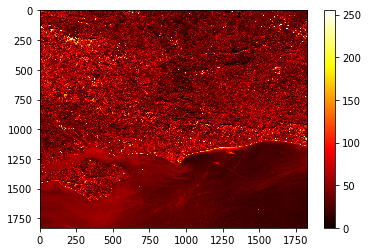

In [13]:
import gdal
import matplotlib.pyplot as plt
raster_ds = gdal.Open("L2A_T30UXB_20170102T111442_TCI_60m.jp2", gdal.GA_ReadOnly)
image_gdal = raster_ds.GetRasterBand(1).ReadAsArray()
print(image_gdal.shape) # dimensions of the image

plt.imshow(image_gdal, cmap = "hot", interpolation='nearest', aspect='auto')
plt.colorbar()
plt.show()